## ANOTACION: 

#### 1. Las celdas con Recomendacion, son indicaciones que pongo para que tengan en cuenta para el parcial
#### 2. Las celdas con Repaso son puntos que deberian repasar
#### 3. Las celdas con Ojo son puntos con los que deben tener mucho cuidado
#### 4. POR FAVOR LEAN LOS COMENTARIOS DE LAS CELDAS


** Recomendacion **: Como deberian resolver el parcial y dividir su tiempo el tiempo en el parcial
    
1. Leer todo el parcial y estimar cuanto se deberian demorar en cada punto 
2. Hacer exploracion rapida
3. Mirar que variables estan mas completas y limpiarlas si son necesarias
4. Organizar cada pregunta y irla respondiendo ayudada de celdas de codigo. Esto es importante para que al profesor le sea facil entender lo que se hizo
5. Impartir mas tiempo a las preguntas con mayor porcentaje del parcial

In [39]:
# Importando modulos
import os, sys
import numpy as np
import pandas as pd
import pandas_profiling

In [40]:
# module to do statistics
import scipy.stats  as stats

# importing modules for contingency
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [41]:
# Modulos de graficos
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import bokeh

In [42]:
# Funciones adicionales
# funcion de otra persona http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame"
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

** Recomendacion **: Hagan una jupyter notebook con sus funciones o celdas de sus propios notebooks que entiendan para hacer las cosas mas rapido y solo tener que copiar y pegar

** Recomendacion **: Para este parcial es importante el manejo del tiempo para que puedan resolver todas las preguntas

## Parte 1. Importando BD y haciendo exploracion rapida

In [43]:
# Obteniendo datos
pathPrin= '/Users/CamilaMV/Desktop/CDAplicada/Principal.xlsx'
# importar datos y creando dataframe
dfPrin = pd.read_excel(pathPrin)

In [44]:
# Revision rapida de las variables
dfPrin.head()

,Ciudad,Cliente,Localidad_Zona,Sexo,Edad,Rango_Edad,Hijos,Categoria_Cliente,Activo,Paquete,Precio_Semanal_Paquete,Cantidad_Horas_Demandadas,Costo,MedioPago,Puntos_Conexion_Cliente,PQR_Id,PQR_Filtro,Campaña
0,Bogota,C_5871,Engativa,Hombre,59.0,a_Mayor_50,3.0,Fiel,1,Basic,6900,5.2,3000.4,Presencial,2,NaN,No,NO_Impacto
1,Bogota 011,C_8093,Engativa,Hombre,52.0,a_Mayor_50,2.0,Nuevo,1,Basic,6900,3.7,2501.1,Presencial,1,NaN,No,NO_Impacto
2,Bogota,C_8387,Teusaquillo,Hombre,75.0,a_Mayor_50,4.0,Fiel,1,Basic,6900,14.3,4000.9,NaN,4,NaN,No,NO_Impacto
3,Bogota,C_9658,Engativa,Hombre,52.0,a_Mayor_50,1.0,Fiel,1,Basic,6900,2.9,3500.3,Presencial,3,NaN,No,NO_Impacto
4,Bogota,C_9721,Teusaquillo,Hombre,62.0,a_Mayor_50,4.0,Fiel,1,Basic,6900,10.1,3002.7,Electronico,2,NaN,No,NO_Impacto


In [45]:
# Revision del tamano de la base de datos
dfPrin.shape

(2690, 18)

** Ojo **: Deteccion de tipos de variable como los importa python, pero este no es necesariamente el perfilamiento de las varaibles

In [46]:
dfPrin.dtypes

Ciudad                        object
Cliente                       object
Localidad_Zona                object
Sexo                          object
Edad                         float64
Rango_Edad                    object
Hijos                        float64
Categoria_Cliente             object
Activo                         int64
Paquete                       object
Precio_Semanal_Paquete         int64
Cantidad_Horas_Demandadas    float64
Costo                        float64
MedioPago                     object
Puntos_Conexion_Cliente        int64
PQR_Id                        object
PQR_Filtro                    object
Campaña                       object
dtype: object

** Recomendacion **: Usen pandas profiling para hacer un analisis de la calidad de la BD rapido

In [47]:
# Usando pandas profiling
pandas_profiling.ProfileReport(dfPrin)

Number of variables,18
Number of observations,2690
Total Missing (%),11.0%
Total size in memory,378.4 KiB
Average record size in memory,144.0 B
Numeric,6
Categorical,10
Date,0
Text (Unique),1
Rejected,1
Constant value,1


In [48]:
# Mirando missing values por variable
missing_values_table(dfPrin)

,Missing Values,% of Total Values
Ciudad,0,0.000000
Cliente,0,0.000000
Localidad_Zona,19,0.706320
Sexo,750,27.881041
Edad,750,27.881041
Rango_Edad,750,27.881041
Hijos,750,27.881041
Categoria_Cliente,0,0.000000
Activo,0,0.000000
Paquete,0,0.000000


In [49]:
# Luego de mirar los missing values, solo explorar las variables problema en vez de todo
dfPrin.Localidad_Zona.unique()

array(['Engativa', 'Teusaquillo', 'Suba', 'Barrios Unidos', 'Nororiental',
       'Noroccidental', 'Suroccidental', 'Suroriental',
       'Centro Occidental', 'Centro Oriental', nan], dtype=object)

In [52]:
# mirando Sexo
dfPrin.Sexo.unique()

array(['Hombre', 'Mujer', nan], dtype=object)

In [51]:
# mirando Edad
dfPrin.Edad.unique()

array([  59.,   52.,   75.,   62.,   78.,   54.,   55.,   51.,   69.,
         65.,   42.,   58.,   38.,   39.,   35.,   49.,   34.,   31.,
         37.,   48.,   36.,   25.,   24.,   29.,   26.,   28.,   27.,
         22.,   23.,  220.,   71.,   80.,   74.,   53.,   68.,   56.,
         63.,   57.,   72.,   66.,   46.,   45.,   47.,  210.,   20.,   nan])

#### Hay valores de 210 en la edad que se deberia cambiar

In [56]:
# mirando Hijos
dfPrin.Hijos.unique()

array([  3. ,   2. ,   4. ,   1. ,   0. ,   0.8,   0.1,  10. ,   5. ,
         6. ,   7. ,   8. ,   nan])

#### Hay valores de 0.1 hijos

In [57]:
dfPrin.MedioPago.unique()

array(['Presencial', nan, 'Electronico'], dtype=object)

In [58]:
dfPrin.PQR_Id.unique()

array([nan, 'A30220A4', 'A30220A7', 'A302202A', 'A3022023', 'PRQA236',
       'PRQA233', 'PRQA240', 'PRQA24A', 'PRQA237', 'PRQA239', 'PRQA245',
       'PRQA252', 'PRQA256', 'PRQA255', 'PRQA263', 'PRQA267', 'A30220A5',
       'PRQA268', 'PRQA269', 'PRQA287', 'A3022022', 'A30220A6', 'PRQA232',
       'PRQA23A', 'PRQA230', 'PRQA235', 'PRQA289', 'PRQA290', 'PRQA288',
       'PRQA294', 'PRQA292', 'PRQA29A', 'PRQA293', 'PRQA295', 'A30220A0',
       'PRQA302', 'PRQA300', 'A30220A3', 'PRQA30A', 'PRQA299', 'A30220AA',
       'A3022020', 'A30220A9', 'PRQA234', 'PRQA242', 'PRQA246', 'PRQA244',
       'PRQA250', 'PRQA243', 'PRQA248', 'PRQA249', 'PRQA25A', 'PRQA253',
       'PRQA257', 'PRQA254', 'PRQA258', 'PRQA26A', 'PRQA259', 'PRQA264',
       'PRQA262', 'PRQA266', 'PRQA265', 'PRQA270', 'A30220A8', 'PRQA296',
       'PRQA297', 'PRQA298', 'A30220A2', 'PRQA238', 'PRQA247', 'PRQA260',
       'A0A4A7A8A75', 'A0A4A3A0A67', 'A0A40698A55', 'A0A40086A43',
       'A0A4A5A4A7A', 'A0A40290A47', 'A0A39474A3A

In [59]:
dfPrin.Campaña.unique()

array(['NO_Impacto', 'SI_Impacto', nan], dtype=object)

## Recomendacion 0: Eliminando missing values, pero primero se debe saber donde estan y cuantos son. 
## Igualmente, hacer anotaciones en las celdas de su codigo que luego pueden usar para al final poner la respuesta del punto


In [62]:
# Generen otro dataframe que tenga un nombre facil de identificar para ustedes
dataNullDf = dfPrin[pd.isnull(dfPrin).any(axis=1)]

In [63]:
dataNullDf.shape

(1759, 18)

In [64]:
# Filas que tienen mas de 4 Nan en la misma fila
dfErase_750 = dfPrin.ix[np.argwhere(dfPrin.isnull().sum(1)>=4).ravel()[0]:]

In [65]:
dfErase_750

,Ciudad,Cliente,Localidad_Zona,Sexo,Edad,Rango_Edad,Hijos,Categoria_Cliente,Activo,Paquete,Precio_Semanal_Paquete,Cantidad_Horas_Demandadas,Costo,MedioPago,Puntos_Conexion_Cliente,PQR_Id,PQR_Filtro,Campaña
1940,Bogota,C_EWX1,Teusaquillo,NaN,NaN,NaN,NaN,Fiel,1,Premium,27000,5.0,7775.0,Electronico,1,NaN,No,NaN
1941,Bogota,C_EWX10,Engativa,NaN,NaN,NaN,NaN,Flotante,1,Premium,27000,6.0,8060.0,Electronico,4,NaN,No,NaN
1942,Bogota,C_EWX100,Engativa,NaN,NaN,NaN,NaN,Nuevo,1,Premium,27000,5.0,7775.0,Electronico,1,NaN,No,NaN
1943,Bogota,C_EWX101,Engativa,NaN,NaN,NaN,NaN,Fiel,1,Premium,27000,6.0,8150.0,Electronico,5,NaN,No,NaN
1944,Bogota,C_EWX102,Teusaquillo,NaN,NaN,NaN,NaN,Fiel,1,Premium,27000,4.0,7760.0,Electronico,1,NaN,No,NaN
1945,Bogota,C_EWX103,Engativa,NaN,NaN,NaN,NaN,Flotante,1,Premium,27000,5.0,8000.0,Electronico,4,NaN,No,NaN
1946,Bogota,C_EWX104,Teusaquillo,NaN,NaN,NaN,NaN,Flotante,1,Premium,27000,6.0,7790.0,Electronico,1,NaN,No,NaN
1947,Bogota,C_EWX105,Engativa,NaN,NaN,NaN,NaN,Fiel,1,Premium,27000,4.0,8120.0,Presencial,7,NaN,No,NaN
1948,Bogota,C_EWX106,Teusaquillo,NaN,NaN,NaN,NaN,Fiel,1,Premium,27000,5.0,7775.0,Electronico,1,NaN,No,NaN
1949,Bogota,C_EWX107,Suba,NaN,NaN,NaN,NaN,Fiel,1,Premium,27000,6.0,8420.0,Presencial,8,NaN,No,NaN


In [66]:
# Graficando variables brutas
dfErase_750.index.tolist()

[1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068,
 2069,
 2070,
 2071,
 2072,
 2073,
 2074,
 2075,
 2076,
 2077,
 2078,
 2079,
 2080,
 2081,
 2082,

## Parte 2: Limpiando de Nan, Droping nan en mas de 5 columnas

In [69]:
# Uso otro dataframe por si necesito el original
dfPrinV2 = dfPrin.drop(dfPrin.index[dfErase_750.index.tolist()])

In [70]:
dfPrinV2.head()

,Ciudad,Cliente,Localidad_Zona,Sexo,Edad,Rango_Edad,Hijos,Categoria_Cliente,Activo,Paquete,Precio_Semanal_Paquete,Cantidad_Horas_Demandadas,Costo,MedioPago,Puntos_Conexion_Cliente,PQR_Id,PQR_Filtro,Campaña
0,Bogota,C_5871,Engativa,Hombre,59.0,a_Mayor_50,3.0,Fiel,1,Basic,6900,5.2,3000.4,Presencial,2,NaN,No,NO_Impacto
1,Bogota 011,C_8093,Engativa,Hombre,52.0,a_Mayor_50,2.0,Nuevo,1,Basic,6900,3.7,2501.1,Presencial,1,NaN,No,NO_Impacto
2,Bogota,C_8387,Teusaquillo,Hombre,75.0,a_Mayor_50,4.0,Fiel,1,Basic,6900,14.3,4000.9,NaN,4,NaN,No,NO_Impacto
3,Bogota,C_9658,Engativa,Hombre,52.0,a_Mayor_50,1.0,Fiel,1,Basic,6900,2.9,3500.3,Presencial,3,NaN,No,NO_Impacto
4,Bogota,C_9721,Teusaquillo,Hombre,62.0,a_Mayor_50,4.0,Fiel,1,Basic,6900,10.1,3002.7,Electronico,2,NaN,No,NO_Impacto


In [71]:
# Verificacion del missing
missing_values_table(dfPrinV2)

,Missing Values,% of Total Values
Ciudad,0,0.000000
Cliente,0,0.000000
Localidad_Zona,0,0.000000
Sexo,0,0.000000
Edad,0,0.000000
Rango_Edad,0,0.000000
Hijos,0,0.000000
Categoria_Cliente,0,0.000000
Activo,0,0.000000
Paquete,0,0.000000


In [72]:
# Variables con problemas son PQR_Id, que no se va a usar para hipotesis
# Hay 3 nan en medio de pago

In [73]:
dfPrinV2.iloc[[2,65,99]]
# se tomo la decision que si hay la edad es mayor a 50, el medio de pago es presencial

,Ciudad,Cliente,Localidad_Zona,Sexo,Edad,Rango_Edad,Hijos,Categoria_Cliente,Activo,Paquete,Precio_Semanal_Paquete,Cantidad_Horas_Demandadas,Costo,MedioPago,Puntos_Conexion_Cliente,PQR_Id,PQR_Filtro,Campaña
2,Bogota,C_8387,Teusaquillo,Hombre,75.0,a_Mayor_50,4.0,Fiel,1,Basic,6900,14.3,4000.9,NaN,4,NaN,No,NO_Impacto
65,Bogota,C_72055,Engativa,Mujer,51.0,a_Mayor_50,2.0,Flotante,1,Basic,6900,2.0,2500.1,NaN,1,PRQA23A,Si,NO_Impacto
99,Bogota,C_106302,Engativa,Mujer,68.0,a_Mayor_50,3.0,Fiel,1,Basic,6900,11.6,4501.1,NaN,5,NaN,No,NO_Impacto


In [74]:
# Cambio de las filas de esta variable 
dfPrinV2.loc[2,'MedioPago'] = 'Presencial'
dfPrinV2.loc[65,'MedioPago'] = 'Presencial'
dfPrinV2.loc[99,'MedioPago'] = 'Presencial'

In [75]:
#### Cambio de la variable edad

In [77]:
# Se pidio que fuera mayor a 80 porque arriba se vio que habian personas con edades de 210
dfPrinV2[dfPrinV2.Edad > 80]

,Ciudad,Cliente,Localidad_Zona,Sexo,Edad,Rango_Edad,Hijos,Categoria_Cliente,Activo,Paquete,Precio_Semanal_Paquete,Cantidad_Horas_Demandadas,Costo,MedioPago,Puntos_Conexion_Cliente,PQR_Id,PQR_Filtro,Campaña
56,Bogota,C_61832,Barrios Unidos,Hombre,220.0,a_Mayor_50,1.0,Nuevo,1,Basic,6900,3.9,2500.3,Presencial,1,PRQA269,Si,NO_Impacto
613,Bogota,C_619199,Engativa,Hombre,210.0,a_Mayor_50,0.0,Nuevo,1,Modular,4418,18.1,2591.9,Electronico,2,A0087657AA5,Si,NO_Impacto
1608,Bogota,C_1614188,Teusaquillo,Hombre,220.0,a_Mayor_50,0.0,Fiel,1,Premium,12500,3.6,6295.9,Electronico,1,NaN,No,NO_Impacto
1718,Bogota,C_1726982,Suba,Hombre,220.0,a_Mayor_50,1.0,Fiel,1,Premium,12500,2.9,6045.7,Presencial,1,NaN,No,NO_Impacto


In [78]:
dfPrinV2.loc[56,'Edad'] = 22.0
dfPrinV2.loc[613,'Edad'] = 21.0
dfPrinV2.loc[1608,'Edad'] = 22.0
dfPrinV2.loc[1718,'Edad'] = 22.0

## Recomendacion 1: Hagan una tabla donde ponen el tipo de variable de la base de datos, asi es mas facil saber cual usar para las pruebas estadisticas y no escriben tanto

## Mirando el tipo de variables

Variable                  | Tipo de Variable
  ------------------------| -------------
  Ciudad                  | Categorica nominal
  Cliente                 | Categorica con unico id
  Localidad_Zona          | Categorica nominal
  Sexo                    | Categorica nominal (M o F) , tiene un 27.88% de missing
  Edad                    | Numerica
  Rango_Edad              | Categorica ordinal, tiene missing, se debe organizar 
  Hijos                   | Numerica discreta, es el numero de hijos del cliente
  Categoria_Cliente       | Categorica ordinal, aunque se puede ver que cliente paga mas
  Activo                  | Categorico numerico, solo tiene valores de 1. Todos estan activos
  Paquete                 | Categorica nominal 
  Precio_Semanal_Paquete  | Numerica discreta
  Cantidad_Horas_Demands  | Numerica continua
  Costo                   | Numerica continua
  MedioPago               | Categorica nominal
  Puntos_Conexion_Cliente | Numerica discreta
  PQR_Id                  | Categorica nominal 
  PQR_Filtro              | Categorica nominal 
  Campaña                 | Categorica nominal

## Recomendacion 2: Escriban la pregunta del parcial y al final del punto escriben una celda que diga respuesta para que le sea facil al profesor calificar y entender lo que hicieron

## Parte 3: Analisis con pruebas estadisticos y graficos

### P1. RESULTADOS EXPLORACION, INDIQUEN QUE DATOS CON PROBLEMAS y QUE DATOS RAROS

Los datos tienen 18 variables y 2690 observaciones

Problemas:

1. Hay 1759 filas que tienen al menos un valor nulo. Si eliminaran todos nos quedariamos con 2690-1759 = 931, lo cual no es bueno
2. Hay 750 filas que tienen igual o mas de 4 valores NAN en diferentes columnas.
Las variables que tienen este problema son Sexo, Edad, Rango_edad (Es obvio porque se relaciona con Edad),
Hijos y campana

Datos raros:

1. Hay 8 variables con problemas de missing values
2. Hijos tiene valores de 0.1 y 0.8, es posible que sea 1 y 1
3. Hay valores de 210 y 220 en la edad, es posible que sea 21 y 22

## OJO: No se demoren mucho en la limpieza, de nada sirve que se gasten 30 minutos limpiando la BD para luego tener poco tiempo de hacer los otros puntos

### P2. PIENSE EN EL NEGOCIO DADO LOS DATOS

### P3. PIENSE QUE HIPOTESIS PUEDEN SERVIR PARA EL NEGOCIO Y PIENSE EN EL ANALISIS QUE PUEDE REALIZAR

** REPASO: TIPOS DE ANALISIS Y SUS HIPOTESIS NULAS **: 
    
ANALIS UNIVARIADO

-Graficas exploratorias que puedan indicarme una tendencia. Por ejemplo: Boxplots (Var. Categorica en X), Histogramas (Var. numerica en X), Barplots (Var. categoria en X)
    
ANALIS BIVARIADO

-Grafico:

    -Diagramas de torta
    -Histogramas por variable categorica
    -Barplot de variable categorica

-Estadistico:

    -Chi-squared (Tabla de contingencia) [Entre variables categoricas, que asume esta prueba ?]
    -Correlacion [Entre variables numericas, que asume esta prueba ?]
    -Prueba de Normalidad [Por que es importante y cuando la hago ?]


## Recomendacion 3 y Repaso: Pueden usar prints y ifs para evaluar las p-values, esto permite que el analisis sea mas rapido. Sin embargo, es importante que entiendan que significa. 

## Por ejemplo: Si una hipotesis es:


### H1: Los jovenes (edades entre 20-30) pagan mas con medio de pago electronico

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111627358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x111d2cb70>], dtype=object)

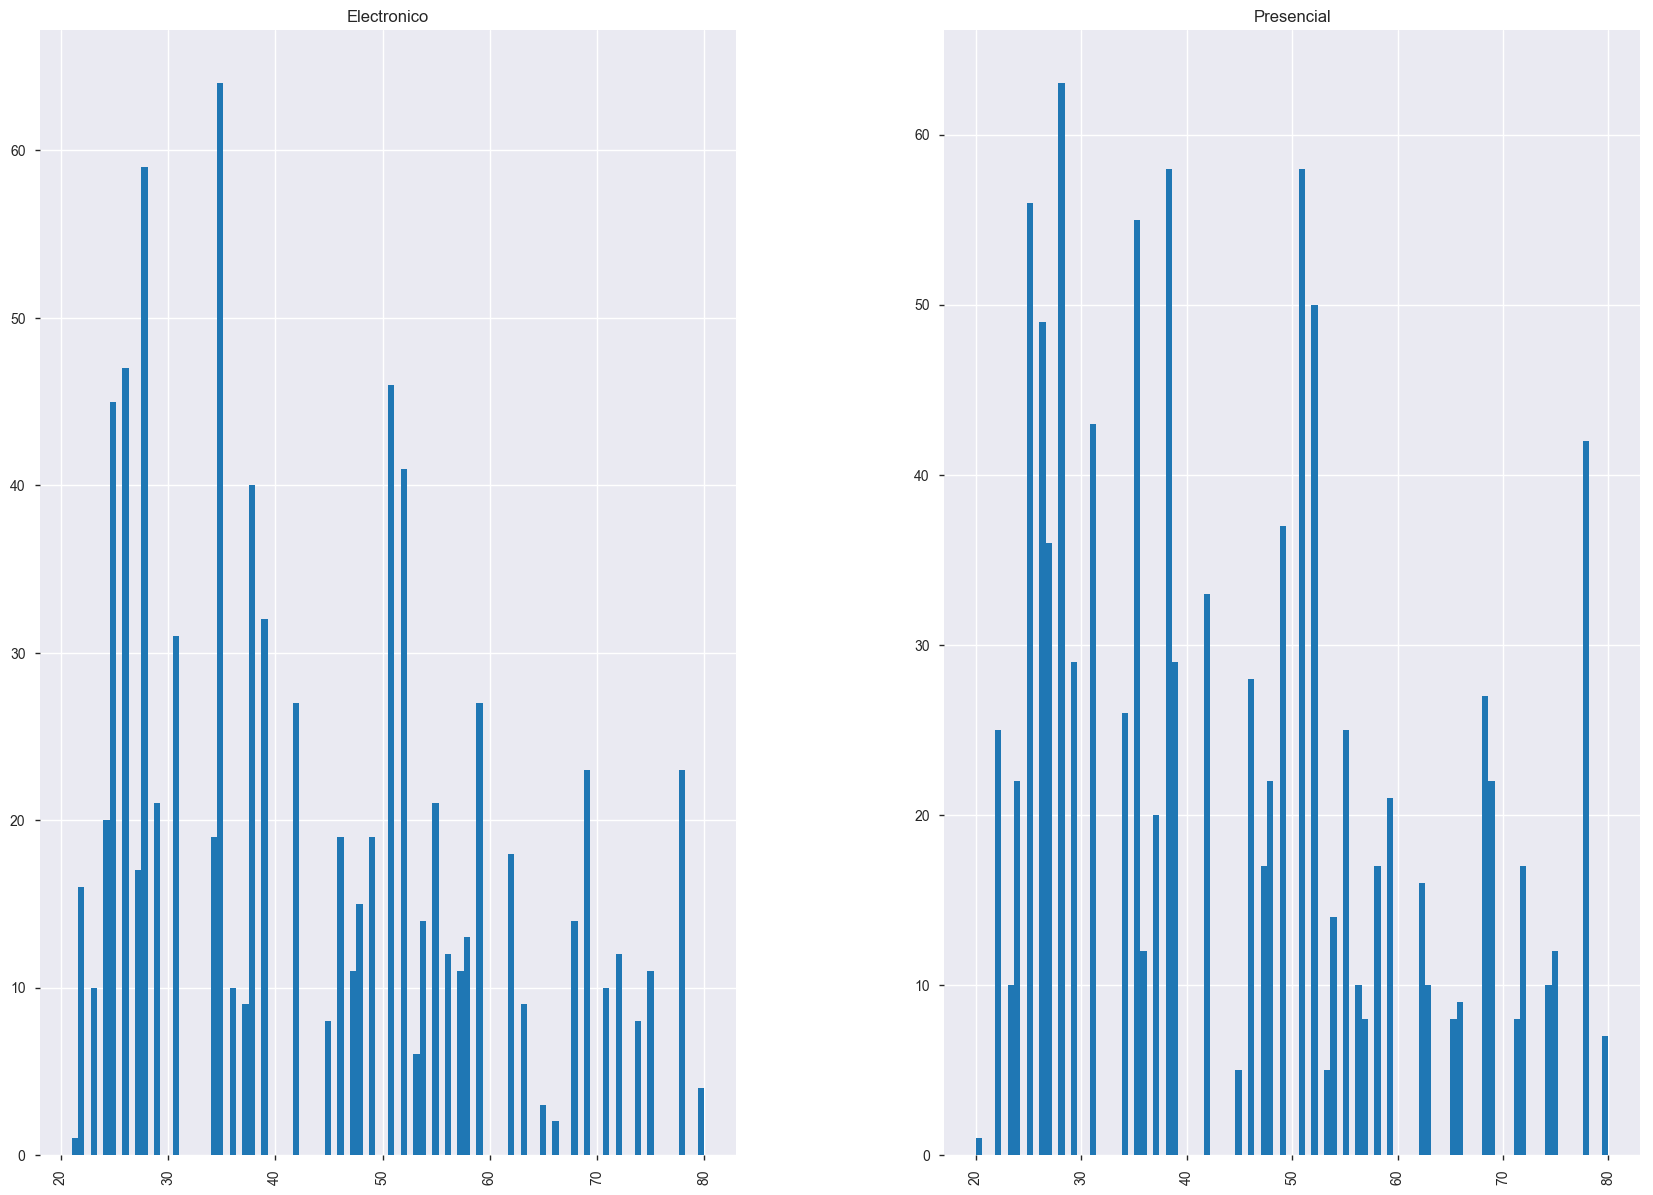

In [86]:
# Estoy usando el dataframe que limpie rapidamente
dfPrinV2.hist('Edad',by='MedioPago',figsize=(20,15),bins=100)

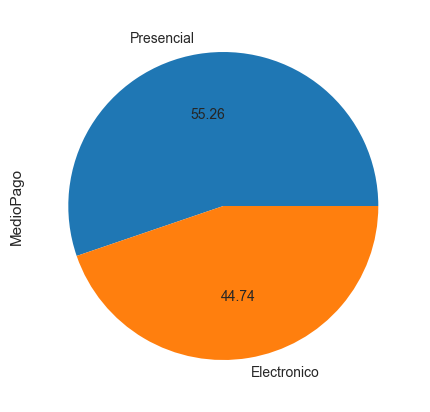

In [87]:
# Haciendo pie chart dado MEDIO DE PAGO
dfPrinV2.MedioPago.value_counts().plot(kind='pie',figsize=(5, 5),autopct='%.2f')

In [88]:
# Que tipo de variables son Medio de Pago y Rango de Edad ?
# Haciendo tabla de contingencia
TablaH1 = pd.crosstab(index=dfPrinV2.MedioPago,columns = dfPrinV2['Rango_Edad'],margins = True)

In [89]:
TablaH1

Rango_Edad,a_Mayor_50,b_Menor_50_mayor_30,c_Menor_30,All
MedioPago,,,,
Electronico,330,304,234,868
Presencial,398,385,289,1072
All,728,689,523,1940


In [90]:
TablaH1.index = ["Electronico","Presencial","TOTAL_RANGO_EDAD"]
TablaH1.columns=["a_Mayor_50","b_Menor_50_mayor_30","c_Menor_30","TOTAL_MEDIO_DE_PAGO"]

## OJO: Piense cuando una tabla de contingencia no cumple los requisitos para hacer Chi-cuadrado ? . Esto lo vieron en clase  :) 

In [92]:
TablaH1

,a_Mayor_50,b_Menor_50_mayor_30,c_Menor_30,TOTAL_MEDIO_DE_PAGO
Electronico,330,304,234,868
Presencial,398,385,289,1072
TOTAL_RANGO_EDAD,728,689,523,1940


In [93]:
# Total sobre filas y columnas
TablaH1/TablaH1.ix['TOTAL_RANGO_EDAD','TOTAL_MEDIO_DE_PAGO']

,a_Mayor_50,b_Menor_50_mayor_30,c_Menor_30,TOTAL_MEDIO_DE_PAGO
Electronico,0.170103,0.156701,0.120619,0.447423
Presencial,0.205155,0.198454,0.148969,0.552577
TOTAL_RANGO_EDAD,0.375258,0.355155,0.269588,1.000000


In [94]:
# Total sobre filas
TablaH1/TablaH1.ix["TOTAL_RANGO_EDAD"]

,a_Mayor_50,b_Menor_50_mayor_30,c_Menor_30,TOTAL_MEDIO_DE_PAGO
Electronico,0.453297,0.441219,0.447419,0.447423
Presencial,0.546703,0.558781,0.552581,0.552577
TOTAL_RANGO_EDAD,1.000000,1.000000,1.000000,1.000000


In [95]:
# Total sobre columnas
TablaH1.div(TablaH1.TOTAL_MEDIO_DE_PAGO, axis=0)

,a_Mayor_50,b_Menor_50_mayor_30,c_Menor_30,TOTAL_MEDIO_DE_PAGO
Electronico,0.380184,0.350230,0.269585,1.0
Presencial,0.371269,0.359142,0.269590,1.0
TOTAL_RANGO_EDAD,0.375258,0.355155,0.269588,1.0


In [96]:
# Generando TablaH1 para hacer chi-cuadrado
TablaH1=pd.crosstab(index=dfPrinV2.MedioPago,columns=dfPrinV2["Rango_Edad"])

In [98]:
TablaH1.index= ["Electronico","Presencial"]
TablaH1
# Se genero la tabla de contingencia

Rango_Edad,a_Mayor_50,b_Menor_50_mayor_30,c_Menor_30
Electronico,330,304,234
Presencial,398,385,289


In [99]:
# Haciendo prueba de chi-cuadrado
chi2_contingency(TablaH1)

(0.2088464653828308,
 0.90084395011802076,
 2,
 array([[ 325.72371134,  308.2742268 ,  234.00206186],
        [ 402.27628866,  380.7257732 ,  288.99793814]]))

In [100]:
# Guardo el p-value en una variable para luego evaluarla 
# dado las condiciones de abajo
pvalue = chi2_contingency(TablaH1)[1]

In [102]:
# Usando prints y if para saber si acepto o no la hipotesis nula y 
# asi concentrarme en el analisis 
print("Hipotesis NULA:", "Las variables son independendientes")
print("P-Value:", pvalue)

pval = pvalue

if pval > 0.05:
    print("Accept NULL hypothesis - Las variables  son independientes es decir no son dependientes")
if pval < 0.05:
    print("Reject NULL hypothesis - Las variables son dependientes.")

Hipotesis NULA: Las variables son independendientes
P-Value: 0.900843950118
Accept NULL hypothesis - Las variables  son independientes es decir no son dependientes


## Recomendacion 4: Siempre es recomendable hacer una grafica para soportar los resultados estadisticos y ver otras tendencias

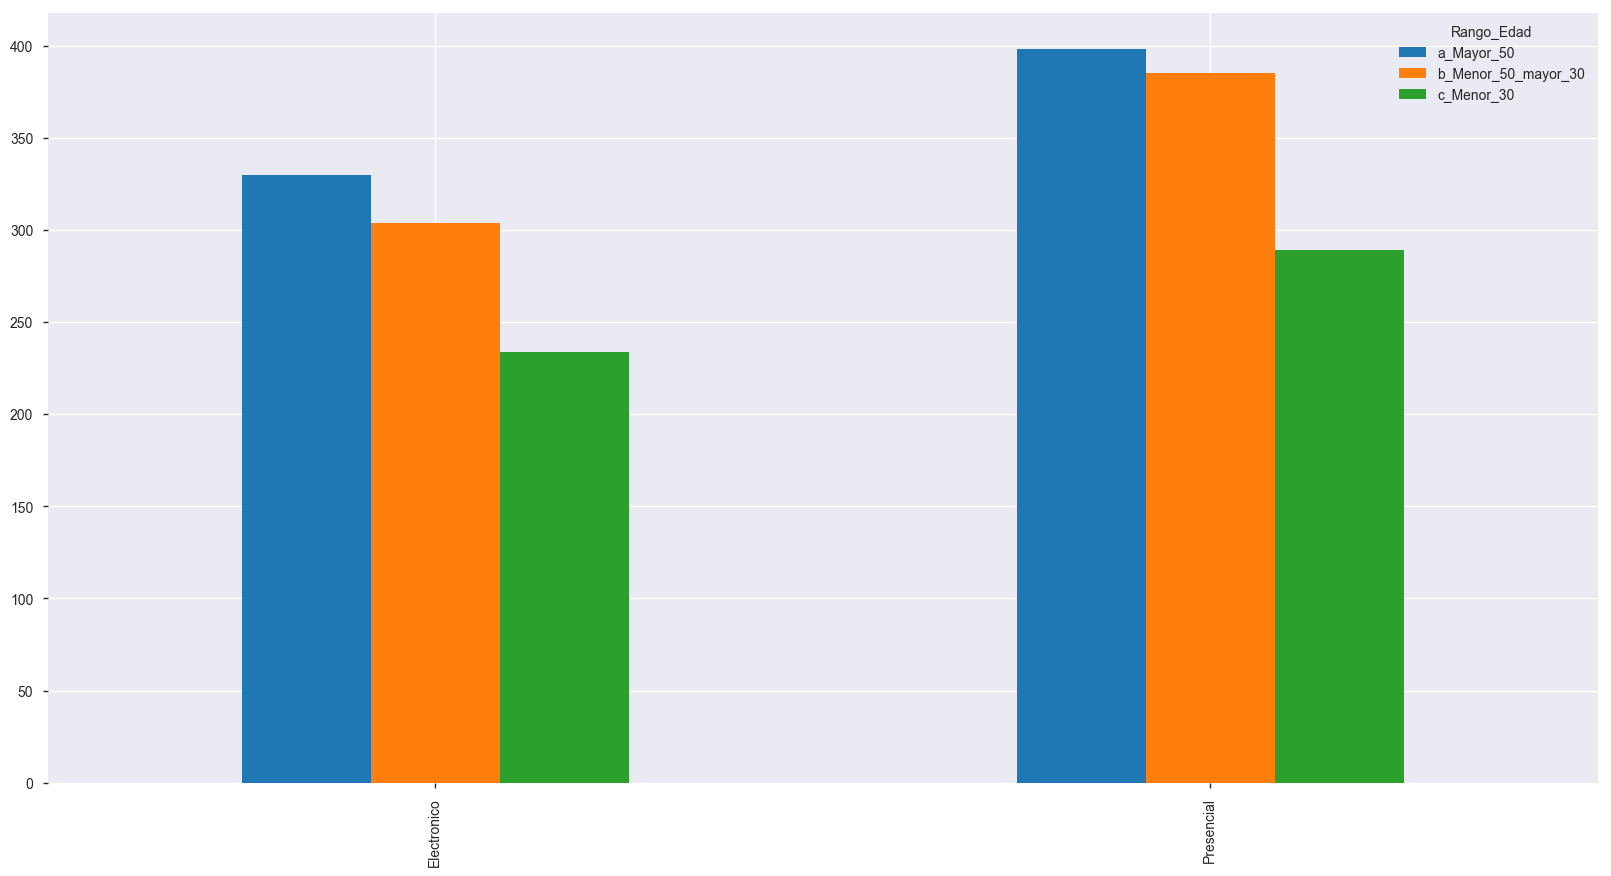

In [103]:
TablaH1.plot(kind='bar',figsize=(20,10),legend=True)

## Respuesta

La edad no esta relacionada con el medio de pago en los datos, es decir no necesariamente los jovenes pagan con medio electronico. 

El valor-p fue mayor a 0.05 por lo cual no se puede rechazar la hipotesis nula

## PRACTICA: En serio les recomiendo que repitan el ejercicio anterior y hagan los dos puntos de abajo

### 1. Hagan una hipotesis para que sea evaluada con pruebas de correlaciones y evaluan la hipotesis nula de la prueba

### 2. Hagan una hipotesis para que sea evaluada con pruebas de chi-cuadrado, cambiando una variable numerica a una categorica de acuerdo a las diapositivas de 6-11 de la Sesion 6. Estadistica Bivariada

<hr>